# Maths for Data Science Programming Assignment 
Q 3 and Q 4


In [43]:
import numpy                      #For arrays and array manipulation of images and matrices
import cvxpy as cp                #For Optimizer
import matplotlib.pyplot as plt   #For plotting 
from PIL import Image             #For image transformations
import cv2                        #For image transformations and visualizations
from google.colab.patches import cv2_imshow #displaying cv2 images
import imageio                    #Displaying incomlete images

In [2]:
dir = '/content/drive/MyDrive/Programming Assignment 2/Data/Group6 Prateek Jain and Ojas Jeetendra Raundale/'

In [6]:
#Loading the arrays containing 
y = numpy.load(dir + 'y.npy')
C = numpy.load(dir + 'C.npy')
A_inv = numpy.load(dir + 'A_inv.npy')

In [7]:
#Checking the shape of all the data
print(y.shape, C.shape, A_inv.shape)

(3000, 1) (3000, 10000) (10000, 10000)


In [46]:
####            Functions           ####

#This function takes input the constraints and the objective and returns the optimized s
def Optimize(y, C, A_inv):         
  s = cp.Variable((C.shape[1],1)) #Defining the variable to optimize
  objective = cp.Minimize(cp.norm(s,1)) #Objective function to minimize 
  constraints = [y==C@s]                #The linear constraint. Note the original problem isnt a linear constraint but it can be remapped to a linear constraint 
  prob = cp.Problem(objective, constraints) #The problem containing both the objective and the constraints
  #result = prob.solve(solver=cp.ECOS)
  print("Solving the Problem")
  result = prob.solve(verbose=True)     #Starts solving the problem
  
  #Appending the result into a list which can be returned to the caller of the function
  ls = []       
  for i in range(10000):
    ls.append(s[i].value)

  optimized_s = numpy.array(ls)
  optimized_s = optimized_s.reshape(-1,1)
  return optimized_s          #Returning the optimized s values


#This function reconstructs X from the s(optimized) found and returns the image array
#image array is returned in matrix form of 100x100 pixels and normalized such that the values range from 0 to 255
#image array contains only 1 channel
def ReconstructImage(s, A_inv):        
  X = numpy.matmul(A_inv, s)
  Xmat = numpy.reshape(X, (-1,100))
  print(Xmat.min(), Xmat.max())
  image = (Xmat - Xmat.min())/(Xmat.max() - Xmat.min())
  image=image.T
  print(image.max(), image.min())
  image *= 255.0
  return image

#This function takes input the 100x100 image and displays the grayscale image
def DisplayGrayScale(image):
  uint_img = numpy.array(image).astype('uint8')
  grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
  cv2_imshow(grayImage)
  return

#This function takes input the R G B image values and displays the RGB image
def DisplayRGB(image_r, image_g, image_b):
  image_rgb = numpy.stack((image_r, image_g, image_b), axis=-1)
  cv2_imshow(image_rgb)
  return


In [ ]:
s = Optimize(y, C, A_inv)     #Calling the Optimize function with inputs containing the vectors of the data provided

In [ ]:
#Reconstructing the X vector from s and getting the image matrix which can be displayed as a grayscale image
image = ReconstructImage(s, A_inv)

40.000000000000725 265.4200344232968
1.0 0.0


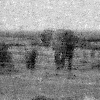

In [ ]:
#Reconstructed Image!
DisplayGrayScale(image)

# Q 5
An image of a dog was chosen and resized to 100x100 pixels.
Following is the image :

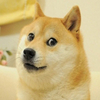

 This image was later divided seperated into 3 different channels i.e. R, G, and B bands and was corrupted and stored in the images named 'incomplete_r.png', 'incomplete_g.png', 'incomplete_b.png'. The respective images' A, C and y matrices/vectors were also stored in the same drive. Now we will try to reconstruct the original doge image by using the 3 deconstructed channels

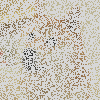

In [44]:
#Displaying the incomplete/Corrupted image.
incomplete_r = imageio.imread(str(dir)+'incomplete_r.png', pilmode='L')
incomplete_g = imageio.imread(str(dir)+'incomplete_g.png', pilmode='L')
incomplete_b = imageio.imread(str(dir)+'incomplete_b.png', pilmode='L')
DisplayRGB(incomplete_r, incomplete_g, incomplete_b)

In [10]:
dir = '/content/drive/MyDrive/MFDS PA 2/'  #Changing directory to a local one containing all the relevant files
#Loading all the vectors
y_r = numpy.load(dir + 'y_r.npy')
y_g = numpy.load(dir + 'y_g.npy')
y_b = numpy.load(dir + 'y_b.npy')
C_r = numpy.load(dir + 'C_r.npy')
C_g = numpy.load(dir + 'C_g.npy')
C_b = numpy.load(dir + 'C_b.npy')
A_inv_r = numpy.load(dir + 'A_inv_r.npy')
A_inv_g = numpy.load(dir + 'A_inv_g.npy')
A_inv_b = numpy.load(dir + 'A_inv_b.npy')

In [11]:
#Checking the shape of all the inputs
print(y_r.shape, C_r.shape, A_inv_r.shape)
print(y_g.shape, C_g.shape, A_inv_g.shape)
print(y_b.shape, C_b.shape, A_inv_b.shape)

(3000, 1) (3000, 10000) (10000, 10000)
(3000, 1) (3000, 10000) (10000, 10000)
(3000, 1) (3000, 10000) (10000, 10000)


In [ ]:
#Optimizing s for R channel
s_r = Optimize(y_r, C_r, A_inv_r)

In [ ]:
#Optimizing s for G channel
s_g = Optimize(y_g, C_g, A_inv_g)

In [ ]:
#Optimizing s for B channel
s_b = Optimize(y_b, C_b, A_inv_b)

In [17]:
#Saving local copies in the drive as each channel takes quite a bit time to get its s optimized
#numpy.save(dir + "s_r", s_r)
#numpy.save(dir + "s_g", s_g)
#numpy.save(dir + "s_b", s_b)

In [27]:
#Loading local copies from the drive
s_r = numpy.load(dir + "s_r.npy")
s_g = numpy.load(dir + "s_g.npy")
s_b = numpy.load(dir + "s_b.npy")


In [45]:
#Reconstruction X vector for all the 3 channels
image_r = ReconstructImage(s_r, A_inv_r)
image_g = ReconstructImage(s_g, A_inv_g)
image_b = ReconstructImage(s_b, A_inv_b)


1.1288747714388592e-12 215.00000000000014
1.0 0.0
4.000000000001043 242.77945867664516
1.0 0.0
6.999999999999044 257.4499525347255
1.0 0.0


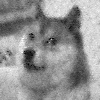

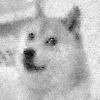

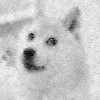

In [31]:
#Displaying reconstructed grayscale image for all channels 
DisplayGrayScale(image_r)
DisplayGrayScale(image_g)
DisplayGrayScale(image_b)

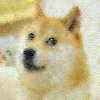

In [41]:
#Final Output in RGB!
DisplayRGB(image_r, image_g, image_b)